# Klasifikasi Titanic Dataset

Nama: Fretty Novelyna Ramadhani
NPM : 23083010005
Kelas: A083 Analisis Data Eksploratif

## Deskripsi Kasus

Titanic dataset merupakan kumpulan informasi tentang penumpang titanic yang tenggelam setelah menabrak gunung es pada 15 April 1912. Dataset ini memiliki tujuan untuk memprediksi apakah seorang penumpang selamat atau tidak. 

1. PassengerId: ID unik untuk penumpang
2. Survived: Apakah penumpang selamat atau tidak (0=Tidakselamat, 1= Selamat)
3. Pclass: Kelas tiket penumpang (1=kelas 1, 2=kelas 2,3=kelas 3)
4. Name: Nama penumpang
5. Sex: Menunjukkan jenis kelamin penumpang ("Male" untuk laki-laki atau "Female" untuk perempuan)
6. Age: Umur penumpang
7. SibSp: Sibling Spouse merupakan jumlah saudara atau pasangan yang ada didalam kapal
8. PArch: Jumlah orang tua atau anak yang ada didalam kapla
9. Ticket: Nomor tiket penumpang
10. Fare: Tarif yang dibayar penumpang
11. Cabin: Nomor kabin penumpang
12. Embarked: Pelabuhan penumpang naik ke kapal (C= Cherbourg, Q= Queenstown, S=Southamton)

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [20]:
df = pd.read_csv("D:/KULIAH/SEMESTER 3/EDA/Titanic Dataset.csv", sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,345.0,0,0,330911,78292.0,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,96875.0,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,86625.0,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,122875.0,NaN,S


In [21]:
df.shape

(418, 12)

## Prepocessing Data

Mengatasi Missing Value

In [22]:
np.sum(df.isnull())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
df['Age'].fillna(df['Age'].mean(), inplace=True)  
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)


In [24]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Membuat Dummy pada Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,345.0,0,0,330911,78292.0,Unknown,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,Unknown,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,96875.0,Unknown,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,86625.0,Unknown,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,122875.0,Unknown,S


Menghitung Frekuensi Jenis Kelamin dan Embarked

In [26]:
# Frekuensi untuk fitur kategori
sex_counts = df['Sex'].value_counts()
embarked_counts = df['Embarked'].value_counts()

print("Frekuensi Sex:\n", sex_counts)
print("Frekuensi Embarked:\n", embarked_counts)


Frekuensi Sex:
 Sex
male      266
female    152
Name: count, dtype: int64
Frekuensi Embarked:
 Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


Untuk menentukan frekuensi jenis kelamin yang ada didalam kapal terdapat penumpang perempuan sejumlah 266 dan p=laki-laki sejumlah 152, lalu untuk pelabuhan dari penumpang yang naik dari pelabuhan S sebanyak 270 penumpang, pelabuhan C sebanyak 102 penumpang dan Pelabuhan Q sebanyak 46 penumpang.

In [27]:
# Rata-rata umur berdasarkan gender
age_by_sex = df.groupby('Sex')['Age'].mean()
print("Rata-rata Umur Berdasarkan Gender:\n", age_by_sex)

# Rata-rata harga tiket berdasarkan kelas
fare_by_pclass = df.groupby('Pclass')['Fare'].mean()
print("Rata-rata Harga Tiket Berdasarkan Kelas:\n", fare_by_pclass)


Rata-rata Umur Berdasarkan Gender:
 Sex
female    34.162135
male      47.965010
Name: Age, dtype: float64
Rata-rata Harga Tiket Berdasarkan Kelas:
 Pclass
1    418080.598131
2     26347.204301
3     49279.703980
Name: Fare, dtype: float64


Pada kode diatas yang menghitung rata-rata dari keompok kategori diketahui bahwa rata-rata umur penumpang yang ada dialam kapal untuk 'Female adalah 32' dan untuk 'male ada 49' untuk harga rata-rata tiket berdasarkan kelas ada di kelas 1 adalah 418080.598131, lalu kelas 2 adalah 26347.204301 dan untuk kelas 3 adalah 48868.165899.

### Diagram Garis

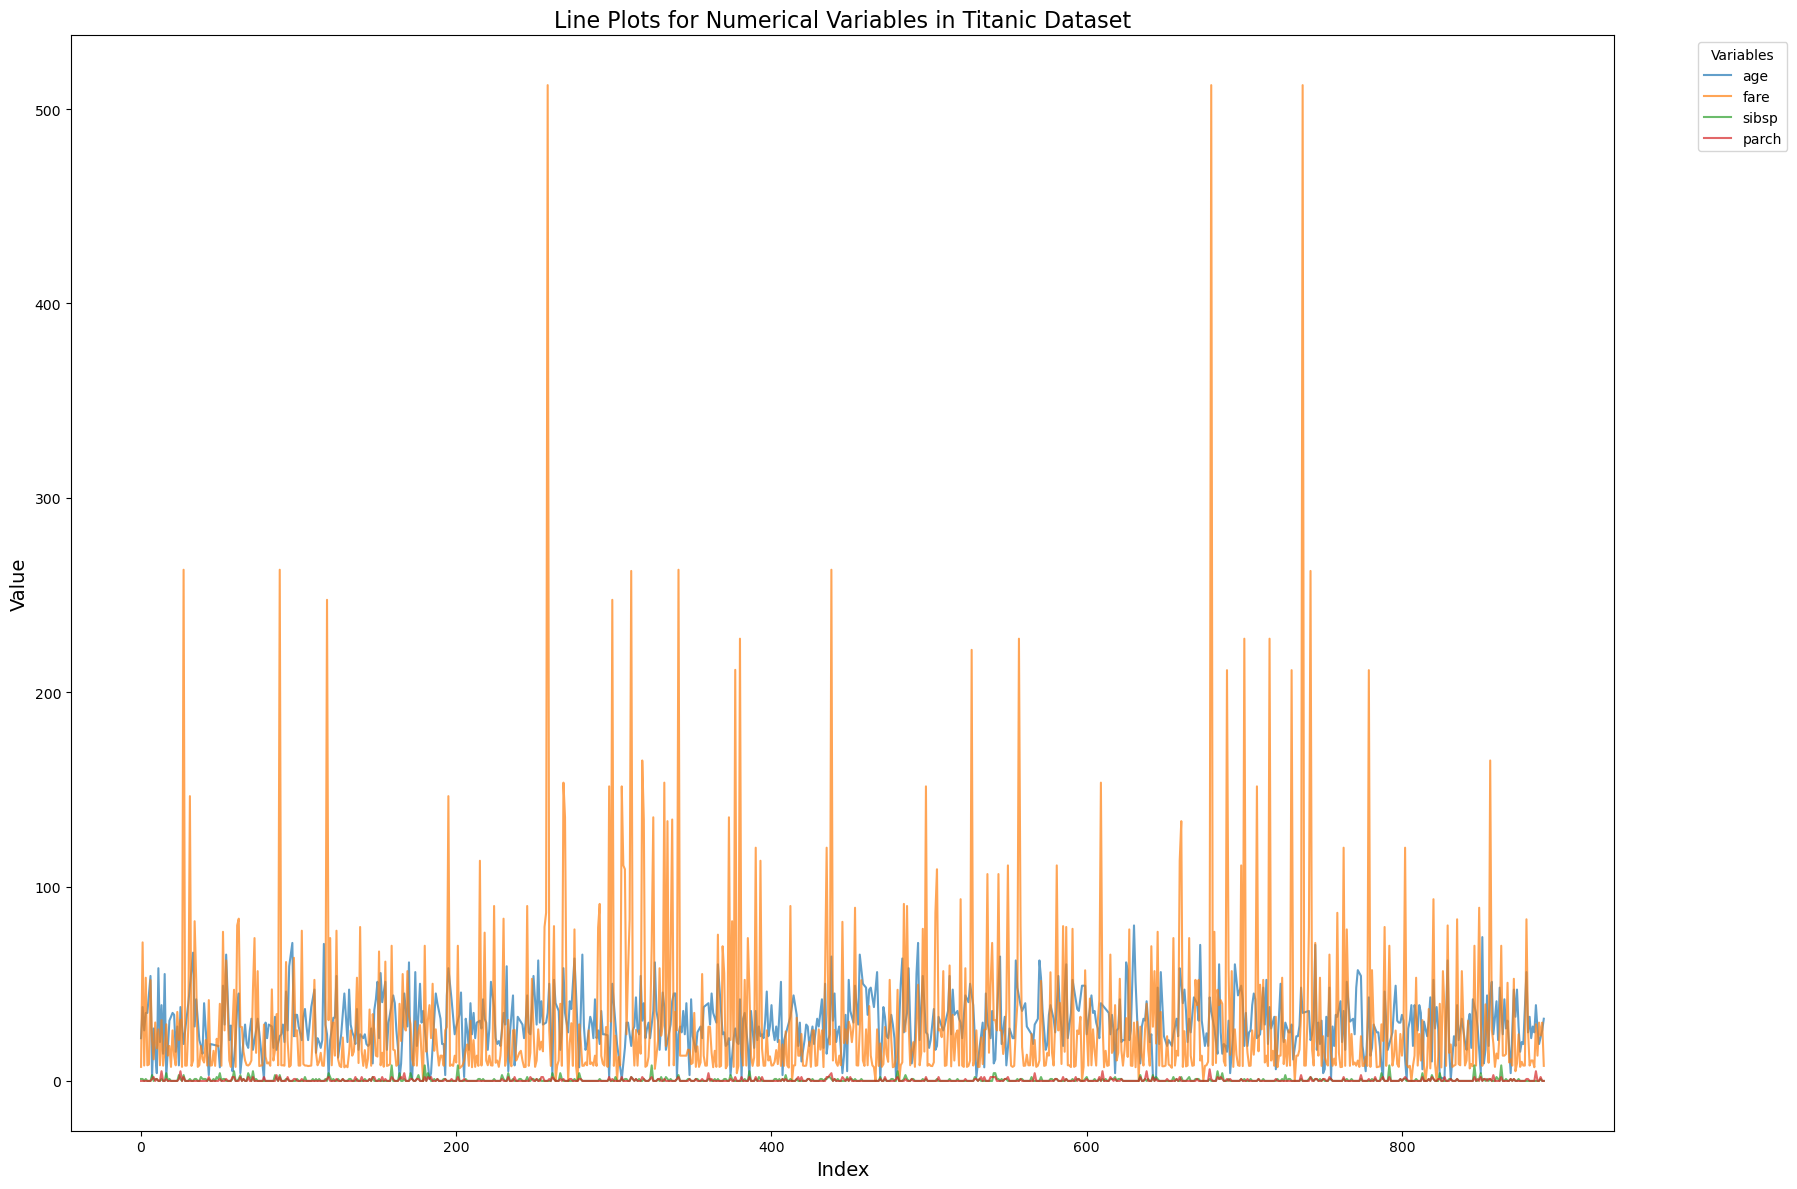

In [84]:
titanic = sns.load_dataset('titanic')

numerical_columns = ['age', 'fare', 'sibsp', 'parch']
plt.figure(figsize=(18, 12))

for column in numerical_columns:
    sns.lineplot(data=titanic, x=titanic.index, y=column, label=column, alpha=0.7)

plt.title('Line Plots for Numerical Variables in Titanic Dataset', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()


### Diagram Garis: Jumlah Penumpang Selamat Berdasarkan Kota Embarked

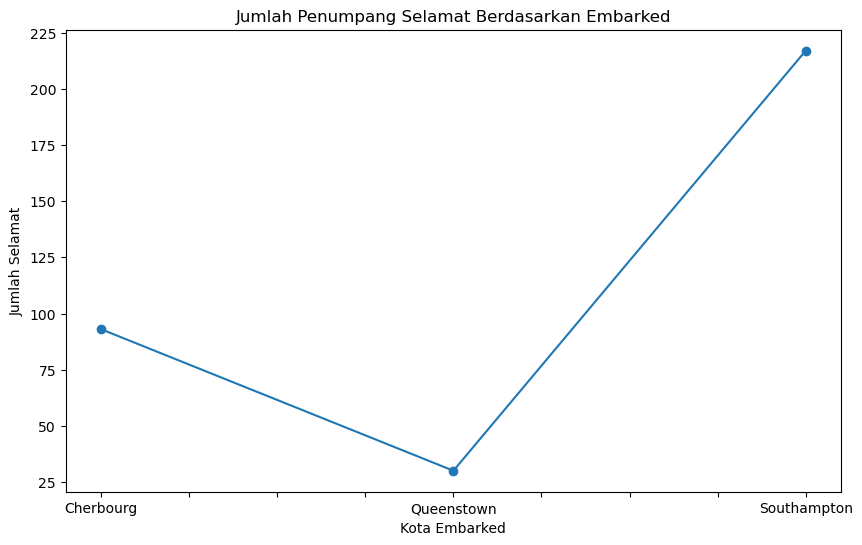

In [85]:
titanic = sns.load_dataset('titanic')

plt.figure(figsize=(10,6))
titanic.groupby('embark_town')['survived'].sum().plot(kind='line', marker='o')
plt.title('Jumlah Penumpang Selamat Berdasarkan Embarked')
plt.ylabel('Jumlah Selamat')
plt.xlabel('Kota Embarked')
plt.show()


Dari diagram garis diatas dapat dilihat bahwa jumlah penumpang yang selamat berdasarkan embarked, dapat dilihat bahwa jumlah penumpang yang selamat dari Cherbourg ada sekitar 93 penumpang, dari Queenstown yang selamat ada sekitar 30 penumpang dan yang dari Southampton ada sekitar 200 penumpang selamat

### Diagram Batang

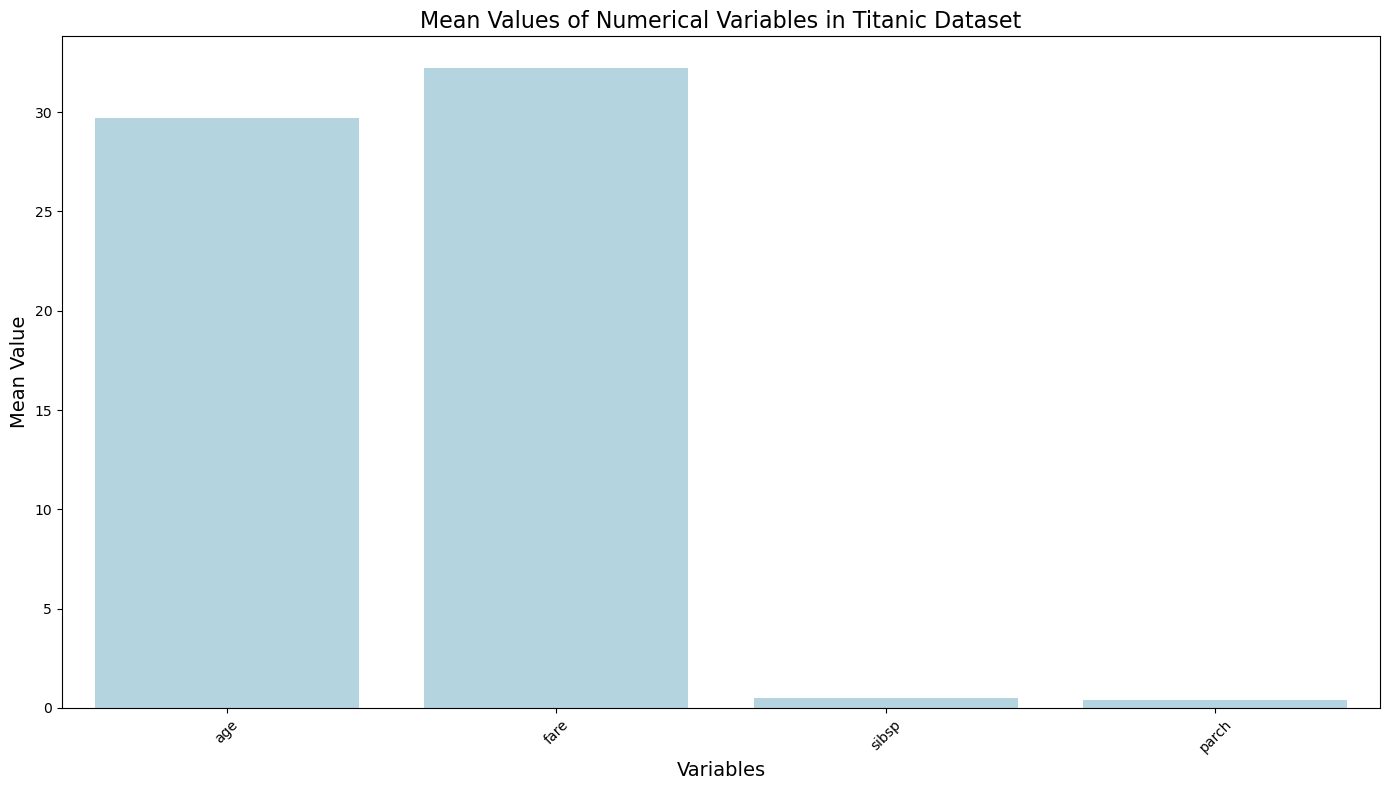

In [76]:
titanic = sns.load_dataset('titanic')

numerical_columns = ['age', 'fare', 'sibsp', 'parch']
means = titanic[numerical_columns].mean()
plt.figure(figsize=(14, 8))
sns.barplot(x=means.index, y=means.values, palette=['#ADD8E6'])  
plt.title('Mean Values of Numerical Variables in Titanic Dataset', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()


### Diagram Batang: Distribusi Selamat dan Tidak Selamat Berdasarkan Jenis Kelamin

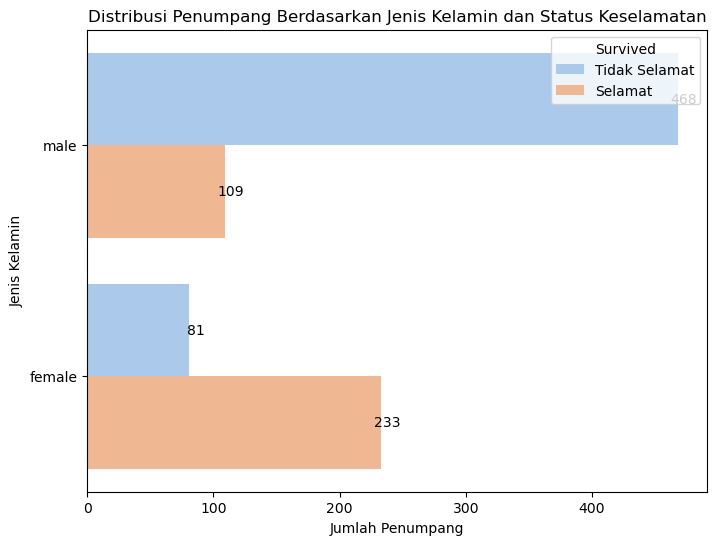

In [41]:
titanic = sns.load_dataset('titanic')

plt.figure(figsize=(8,6))
ax = sns.countplot(data=titanic, y='sex', hue='survived', palette=sns.color_palette("pastel"))  

for p in ax.patches:
    width = p.get_width()  
    ax.text(width + 5, p.get_y() + p.get_height()/2,  
            f'{int(width)}',  
            ha='center', va='center')  

plt.title('Distribusi Penumpang Berdasarkan Jenis Kelamin dan Status Keselamatan')
plt.ylabel('Jenis Kelamin')
plt.xlabel('Jumlah Penumpang')
plt.legend(title='Survived', loc='upper right', labels=['Tidak Selamat', 'Selamat'])
plt.show()

Dapat dilihat pada diagram batang diatas bahwa penumpang selamat berdasrkan jenis kelamin dari kapal itu kebanyakan adalah perempuan dengan jumlah 233 penumpang selamat.

### Diagram Pencar: Hubungan Antara Umur dan Harga Tiket

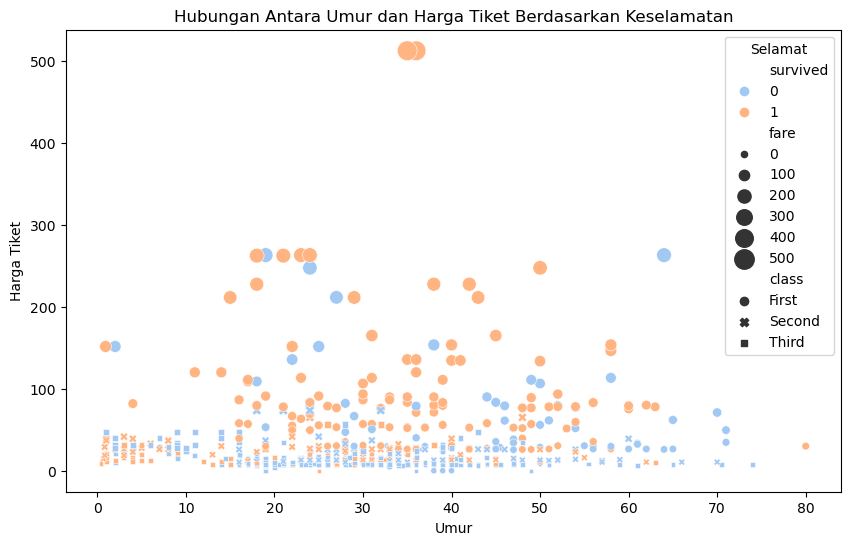

In [42]:
titanic = sns.load_dataset('titanic')
pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(10,6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived', style='class', size='fare', sizes=(20,200),
                palette={0: pastel_palette[0], 1: pastel_palette[1]})  

plt.title('Hubungan Antara Umur dan Harga Tiket Berdasarkan Keselamatan')
plt.xlabel('Umur')
plt.ylabel('Harga Tiket')
plt.legend(title='Selamat')
plt.show()

### Diagram Gelembung

C:\Users\frett\AppData\Local\Temp\ipykernel_8176\998022853.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


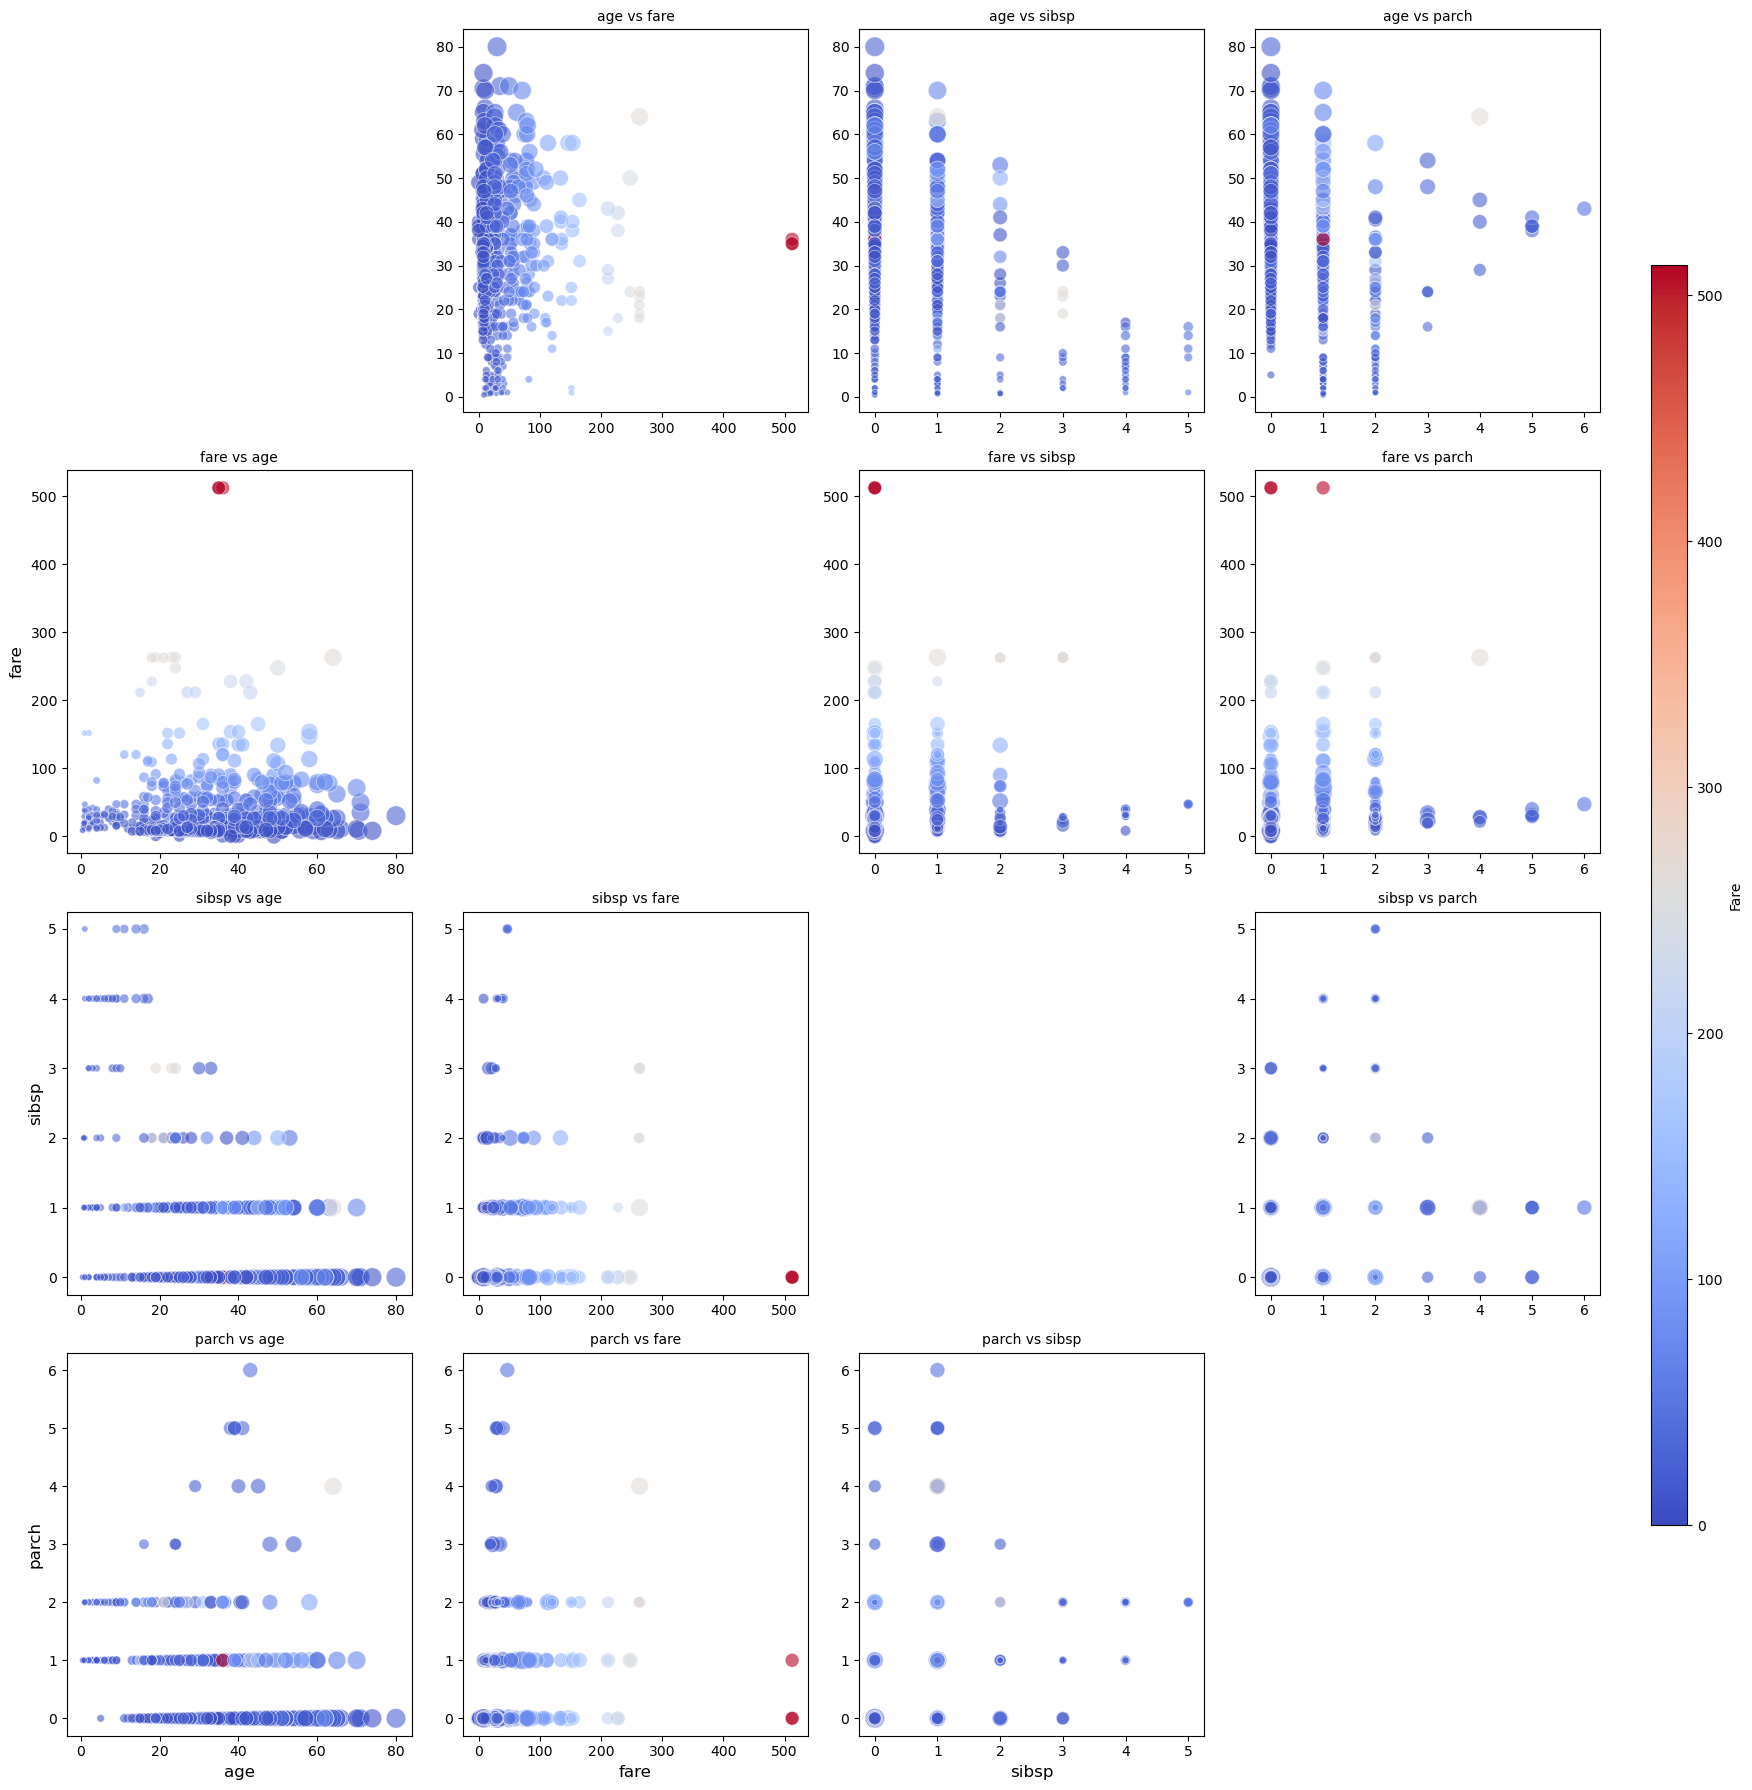

In [86]:
titanic = sns.load_dataset('titanic')
columns = ['age', 'fare', 'sibsp', 'parch']
fig, axes = plt.subplots(nrows=len(columns), ncols=len(columns), figsize=(18, 18))

norm = plt.Normalize(vmin=titanic['fare'].min(), vmax=titanic['fare'].max())
cmap = plt.get_cmap('coolwarm')

for i in range(len(columns)):
    for j in range(len(columns)):
        ax = axes[i, j]
        if i != j:
            sns.scatterplot(
                data=titanic, 
                x=columns[j], 
                y=columns[i], 
                size='age', 
                sizes=(20, 200), 
                hue='fare', 
                palette=cmap, 
                alpha=0.6, 
                legend=None, 
                ax=ax
            )
            ax.set_title(f'{columns[i]} vs {columns[j]}', fontsize=10)
            ax.set_xlabel('')
            ax.set_ylabel('')
            if i == len(columns) - 1:
                ax.set_xlabel(columns[j], fontsize=12)
            if j == 0:
                ax.set_ylabel(columns[i], fontsize=12)
        else:
            ax.axis('off')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 
fig.colorbar(sm, cax=cbar_ax, label='Fare')

plt.tight_layout(rect=[0, 0, 0.9, 1])  
plt.show()


### Area Plot dan Stacked Plot

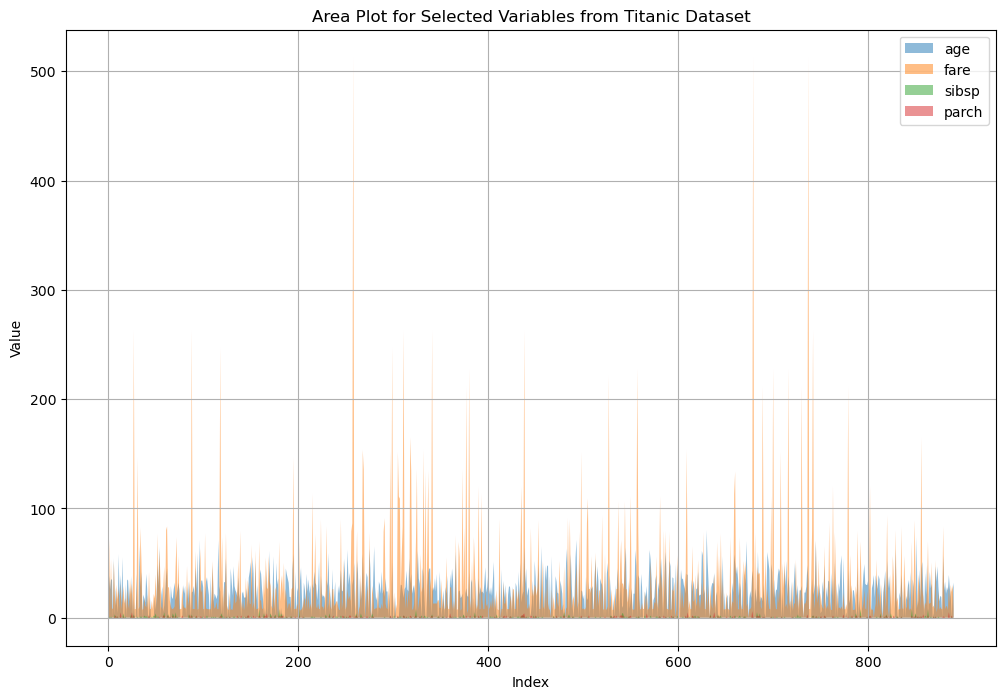

In [87]:
titanic = sns.load_dataset('titanic')
variables = ['age', 'fare', 'sibsp', 'parch']
plt.figure(figsize=(12, 8))

for var in variables:
    plt.fill_between(titanic.index, titanic[var].fillna(0), alpha=0.5, label=var)

plt.title('Area Plot for Selected Variables from Titanic Dataset')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### Diagram Lingkaran

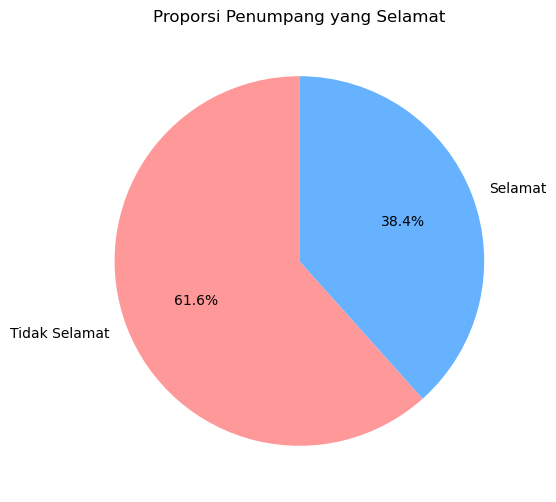

In [88]:
titanic = sns.load_dataset('titanic')

survived_counts = titanic['survived'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(survived_counts, 
        labels=['Tidak Selamat', 'Selamat'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#FF9999', '#66B2FF'])  
plt.title('Proporsi Penumpang yang Selamat')
plt.show()


### Diagram Tabel

In [89]:
titanic = sns.load_dataset('titanic')
summary_table = titanic.describe()

print(summary_table)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


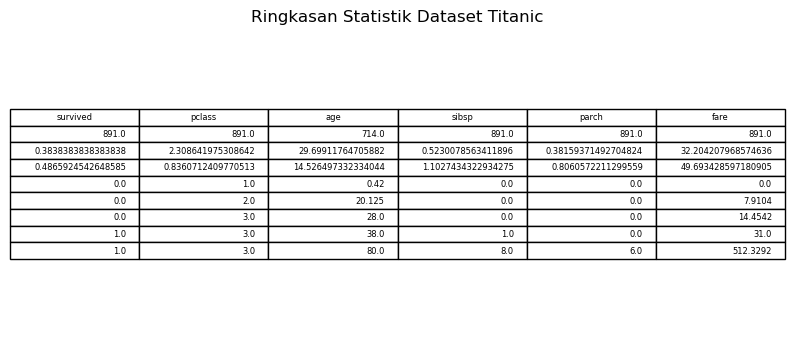

In [90]:
plt.figure(figsize=(10, 4))
plt.table(cellText=summary_table.values, colLabels=summary_table.columns, loc='center')
plt.axis('off')
plt.title('Ringkasan Statistik Dataset Titanic')
plt.show()


### Diagram Polar

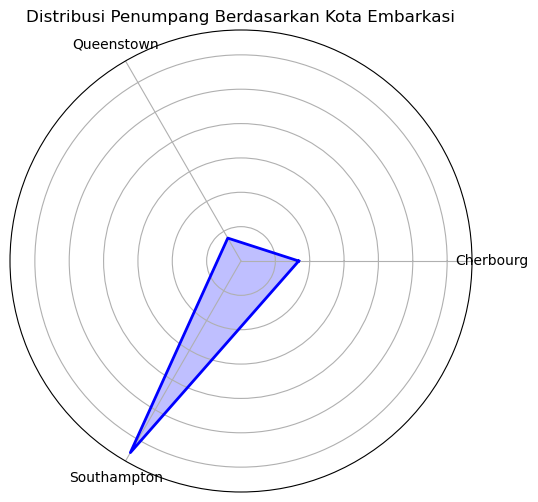

In [91]:
titanic = sns.load_dataset('titanic')
embarked_counts = titanic.groupby('embark_town')['pclass'].count()

angles = np.linspace(0, 2 * np.pi, len(embarked_counts), endpoint=False).tolist()
angles += angles[:1]  

values = embarked_counts.values.flatten().tolist()
values += values[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(embarked_counts.index)

plt.title('Distribusi Penumpang Berdasarkan Kota Embarkasi')
plt.show()


Southampton memiliki radius paling besar dibandingkan Cherbourg dan Queenstown. Jadi Penumpang terbanyak naik dari Southampton, diikuti oleh Cherbourg, sementara jumlah penumpang paling sedikit naik dari Queenstown. Ini sesuai dengan data historis di mana Southampton merupakan pelabuhan utama bagi Titanic, sehingga sebagian besar penumpang memulai perjalanan mereka dari sana.

###  Histogram

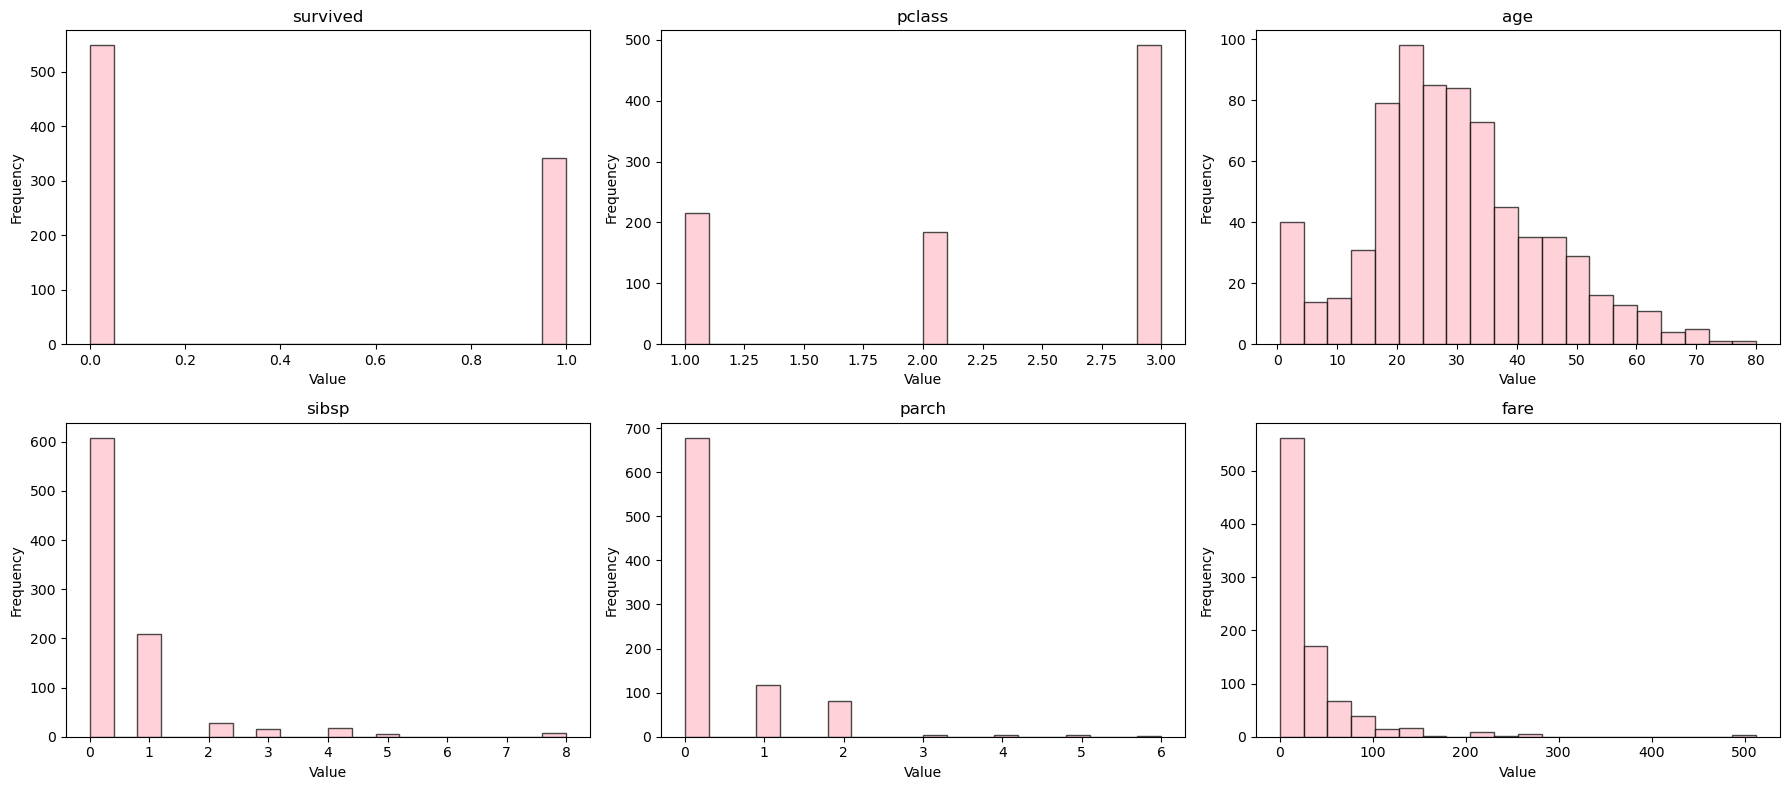

In [92]:
titanic = sns.load_dataset('titanic')

numerical_columns = titanic.select_dtypes(include=np.number).columns.tolist()
num_vars = len(numerical_columns)

nrows = int(np.ceil(num_vars / 3))
ncols = min(3, num_vars)  
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 4 * nrows))

for i, column in enumerate(numerical_columns):
    row = i // ncols
    col = i % ncols
    axes[row, col].hist(titanic[column].dropna(), bins=20, color='pink', edgecolor='black', alpha=0.7)
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

for j in range(i + 1, nrows * ncols):
    row = j // ncols
    col = j % ncols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


### Diagram Lolipop

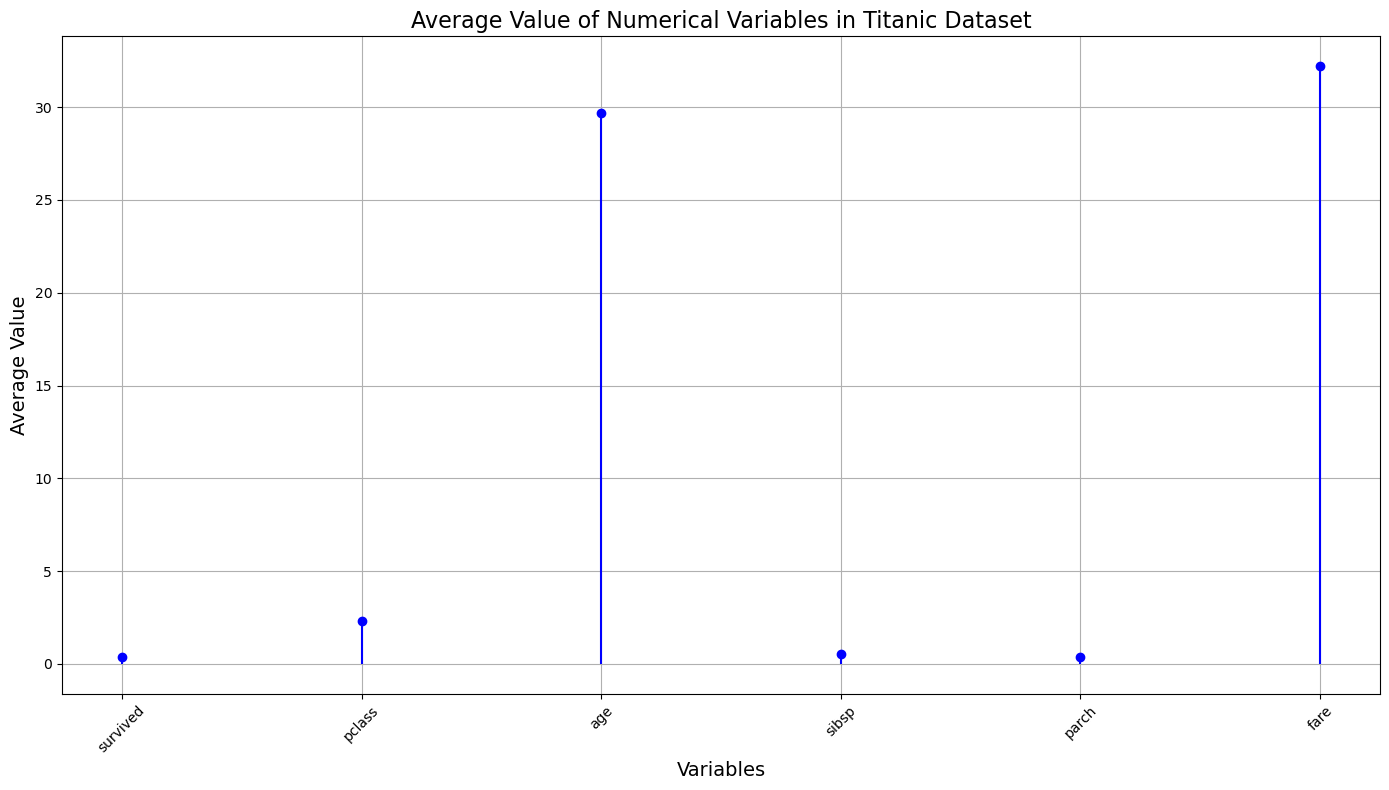

In [80]:
titanic = sns.load_dataset('titanic')

numerical_columns = titanic.select_dtypes(include=np.number).columns.tolist()
means = titanic[numerical_columns].mean()
categories = means.index
values = means.values
fig, ax = plt.subplots(figsize=(14, 8))
ax.stem(categories, values, linefmt='-b', markerfmt='ob', basefmt=' ')

ax.set_title('Average Value of Numerical Variables in Titanic Dataset', fontsize=16)
ax.set_xlabel('Variables', fontsize=14)
ax.set_ylabel('Average Value', fontsize=14)
ax.grid(True)

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


### Lollipop Chart: Jumlah Penumpang Selamat Berdasarkan Kelas

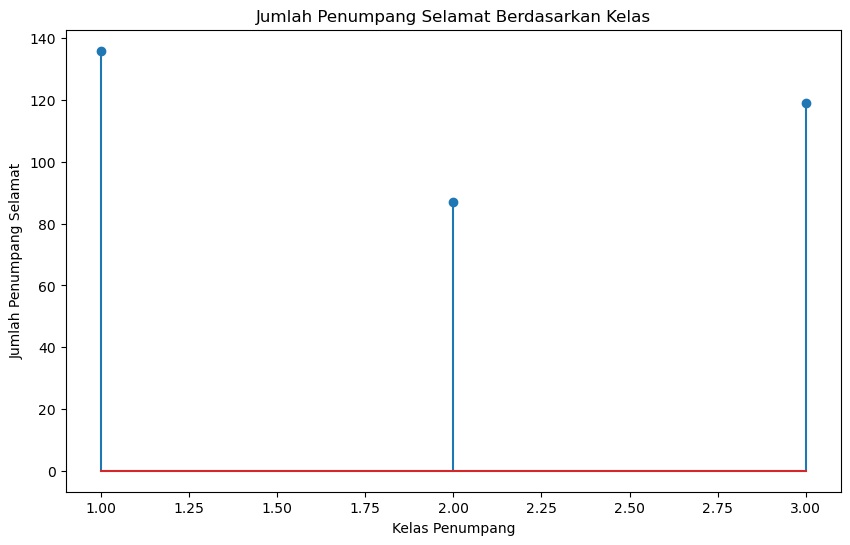

In [77]:
titanic = sns.load_dataset('titanic')

survived_by_class = titanic.groupby('pclass')['survived'].sum()
plt.figure(figsize=(10,6))
plt.stem(survived_by_class.index, survived_by_class.values)
plt.title('Jumlah Penumpang Selamat Berdasarkan Kelas')
plt.xlabel('Kelas Penumpang')
plt.ylabel('Jumlah Penumpang Selamat')
plt.show()


Kesimpulan:
1. Penumpang yang selamat berdasarkan jenis kelamin paling banyak adalah penumpang perempuan
2. Penumpang yang selamat berdasarkan embarked paling banyak ada di Southamton Embarked
3. Jumlah keseluruhan penumpang yang selamat sekitar 38,4%